In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate VEC of alloy composition

In [2]:
import pandas as pd
import re

def calculate_vec(composition, pvec):
    # Parse the composition
    elements = []
    fractions = []
    
    # Split the composition into elements and their fractions
    matches = re.findall(r'([A-Z][a-z]*)(\d*\.?\d*)', composition)
    
    for element, fraction in matches:
        elements.append(element)
        fractions.append(float(fraction) if fraction else 1.0)  # Default to 1 if no fraction is specified

    # Calculate total molar mass
    total_molar_mass = sum(fractions)

    # Calculate molar percentage
    molar_percentages = [(fraction / total_molar_mass) * 100 for fraction in fractions]
    
    # Calculate VEC
    vec_sum = sum(molar_percentage * pvec.get(element, 0) for element, molar_percentage in zip(elements, molar_percentages))
    vec_sum /= 100  # Divide by 100 to get the correct VEC

    return vec_sum

# Define the pvec values for elements
pvec = {'Cr': 6, 'Mo': 6, 'W': 6, 'V': 5, 'Nb': 5, 'Ta': 5, 'Ti': 4, 'Hf': 4, 'Zr': 4}

# Load the alloy data from Excel
df = pd.read_excel("alloy_data_ddft.xlsx")

# Calculate VEC for each alloy
df['VEC'] = df['Alloy Name'].apply(lambda x: calculate_vec(x, pvec))

# Save the updated DataFrame to a new Excel file
df.to_excel("alloy_data_ddft_with_vec.xlsx", index=False)

# Print results
print(df)


                 Alloy Name  DDFT Value       VEC
0                     Ti3Nb       4.253  4.250000
1                     Ti2Nb       4.140  4.333333
2                      TiNb       3.889  4.500000
3                     TiNb2       3.651  4.666667
4                     TiNb3       3.537  4.750000
..                      ...         ...       ...
102               TiNbTaMoW       2.498  5.200000
103               TiVNbTaMo       2.809  5.000000
104              TiZrHfNbTa       3.552  4.400000
105                TiZrHfNb       3.821  4.250000
106  Ti1.5ZrHf0.5Nb0.5Ta0.5       3.817  4.250000

[107 rows x 3 columns]


# Calculate E_vrh using rule of mixture

In [3]:
def calculate_Evrh(composition, evrh):
    # Parse the composition
    elements = []
    fractions = []
    
    # Split the composition into elements and their fractions
    import re
    matches = re.findall(r'([A-Z][a-z]*)(\d*\.?\d*)', composition)
    
    for element, fraction in matches:
        elements.append(element)
        fractions.append(float(fraction) if fraction else 1.0)  # Default to 1 if no fraction is specified

    # Calculate total molar mass
    total_molar_mass = sum(fractions)

    # Calculate molar percentage
    molar_percentages = [(fraction / total_molar_mass) * 100 for fraction in fractions]
    
    # Calculate VEC
    E_sum = sum(molar_percentage * evrh.get(element, 0) for element, molar_percentage in zip(elements, molar_percentages))
    E_sum /= 100  # Divide by 100 to get the correct VEC

    # Prepare results
    results = {
        'Composition': composition,
        'Total Molar Mass': total_molar_mass,
        'Molar Percentages': dict(zip(elements, molar_percentages)),
        'E': E_sum
    }
    
    return E_sum

# Example usage
evrh = {"Cr": 279, "Mo": 329, "W": 382, "V": 130, "Nb": 105, "Ta": 186, "Ti": 116, "Hf": 78, "Zr": 88, "Re": 450, "Ru": 480}


# # Test compositions
# compositions = ['MoW', 'NbMo2', 'NbTa3MoW', 'MoNbTaWTi0.25', 'MoNbTaW']
# results = {comp: calculate_vec(comp, evrh) for comp in compositions}

# for comp, res in results.items():
#     print(f"Results for {comp}:")
#     print(f"  Total Molar Mass: {res['Total Molar Mass']:.2f}")
#     print(f"  Molar Percentages: {res['Molar Percentages']}")
#     print(f"  E: {res['E']:.2f}\n")

# Load the alloy data from Excel
df = pd.read_excel("alloy_data_ddft_with_vec.xlsx")



# Calculate VEC for each alloy
df['E-vrh'] = df['Alloy Name'].apply(lambda x: calculate_Evrh(x, evrh))

# Save the updated DataFrame to a new Excel file
df.to_excel("alloy_data_ddft_with_vec_evrh.xlsx", index=False)

# Print results
print(df.head())

  Alloy Name  DDFT Value       VEC       E-vrh
0      Ti3Nb       4.253  4.250000  113.250000
1      Ti2Nb       4.140  4.333333  112.333333
2       TiNb       3.889  4.500000  110.500000
3      TiNb2       3.651  4.666667  108.666667
4      TiNb3       3.537  4.750000  107.750000


# Load ML model:

In [4]:
# import data 
df = pd.read_excel('alloy_data_ddft_with_vec_evrh.xlsx')


In [5]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

with open('linear_regression.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [6]:
df.head()

,Alloy Name,DDFT Value,VEC,E-vrh
0,Ti3Nb,4.253,4.250000,113.250000
1,Ti2Nb,4.140,4.333333,112.333333
2,TiNb,3.889,4.500000,110.500000
3,TiNb2,3.651,4.666667,108.666667
4,TiNb3,3.537,4.750000,107.750000


In [7]:
X_test = df[['E-vrh']] 

# DOS prediction

In [8]:
y_pred = loaded_model.predict(X_test)
print(y_pred)

[1.41274103 1.4165083  1.42404285 1.4315774  1.43534467 1.12814063
 1.0370411  0.85484205 0.67264299 0.58154347 0.44489418 1.52986899
 1.52062205 1.50212816 1.48363427 1.47438733 1.21444544 1.08498822
 0.82607378 0.56715933 0.43770211 1.40503524 1.36342399 1.28020149
 1.19697899 1.15536774 1.21650032 1.13978493 0.98635415 0.83292337
 0.75620797 1.16204609 1.06717929 0.87744569 0.68771209 0.59284529
 1.04029466 0.96683282 0.81990915 0.67298547 0.59952364 0.49883469
 0.47160757 0.41715334 0.36269912 0.335472   0.84867742 0.94772247
 1.28965393 1.27221031 1.30392598 1.27723334 1.29981622 1.26444744
 1.31027741 1.25988105 1.31401355 1.35160845 1.22023646 1.40719286
 1.36523424 1.32709004 1.29226273 1.26033769 1.22266495 1.22979658
 1.23613581 1.24180775 1.24691249 1.25572978 1.26307752 1.27462397
 1.32643622 1.12279795 1.05313764 1.42712517 1.41048067 1.17951254
 1.4532221  1.28965393 1.02334193 0.95922978 0.84867742 1.42712517
 1.44477842 1.36426028 1.32700701 1.29292424 1.24691249 1.2061

In [9]:
df['DOS'] = y_pred

In [10]:
df.head()

,Alloy Name,DDFT Value,VEC,E-vrh,DOS
0,Ti3Nb,4.253,4.250000,113.250000,1.412741
1,Ti2Nb,4.140,4.333333,112.333333,1.416508
2,TiNb,3.889,4.500000,110.500000,1.424043
3,TiNb2,3.651,4.666667,108.666667,1.431577
4,TiNb3,3.537,4.750000,107.750000,1.435345


In [11]:
df.to_excel("alloy_data_ddft_with_vec_evrh-DOS.xlsx", index=False)

In [12]:
# df= pd.read_excel('alloy_data_ddft_with_vec_evrh-DOS.xlsx')

# Correlation analysis between variables

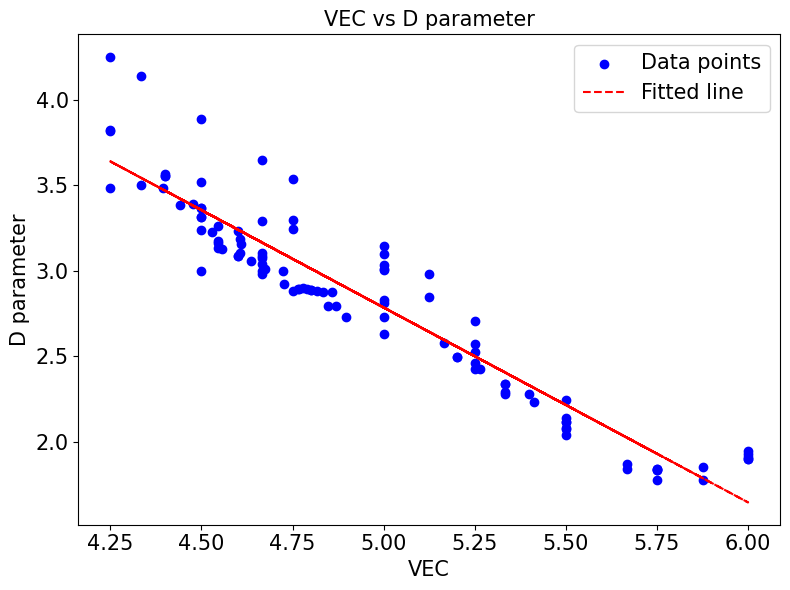

R-squared: 0.8947549271190217


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define the data
x = df['VEC']
y = df['DDFT Value']


# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.xlabel('VEC', fontsize=15)
plt.ylabel('D parameter', fontsize=15)
plt.title('VEC vs D parameter', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# Linear regression
slope, intercept, r_value, _, _ = linregress(x, y)
line_eq = f"y = {slope:.2f}x + {intercept:.2f} (R² = {r_value**2:.4f})"

# Plot the regression line
# plt.plot(x, slope * x + intercept, color='red', linestyle='--', linewidth=1.5, label=line_eq)
plt.plot(x, slope * x + intercept, color='red', linestyle='--', linewidth=1.5, label= 'Fitted line')

plt.legend(fontsize=15)

# Display R-squared value and the equation on the plot
# plt.text(0.05, 0.95, line_eq, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Show plot
plt.tight_layout()
plt.show()

# Print the R-squared value
print("R-squared:", r_value**2)


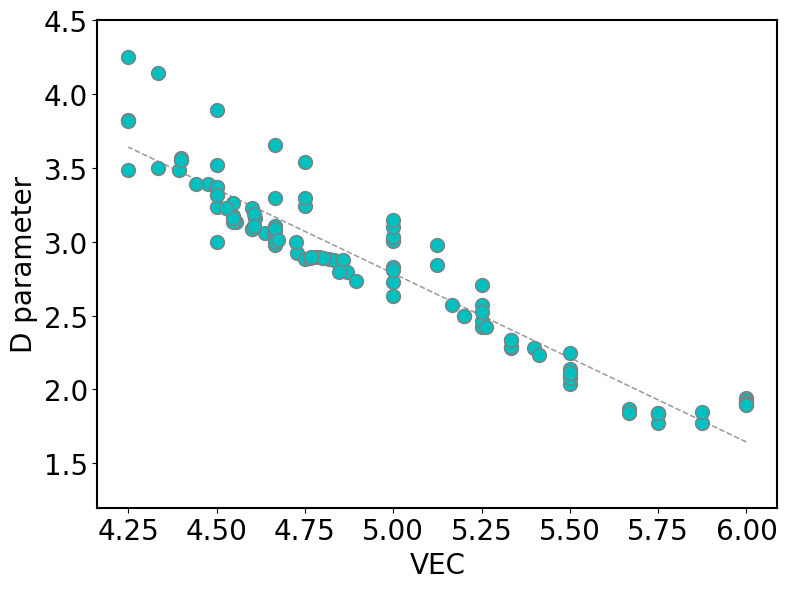

R-squared: 0.8947549271190217


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define the data
x = df['VEC']
y = df['DDFT Value']
alloy =df['Alloy Name']

fs=20

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=100, edgecolors='grey', color= 'c', marker='o', label='Data points')
plt.xlabel('VEC', fontsize=fs)
plt.ylabel('D parameter', fontsize=fs)
# plt.title('VEC vs D parameter', fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylim(1.2, 4.5)
# Linear regression
slope, intercept, r_value, _, _ = linregress(x, y)
line_eq = f"y = {slope:.2f}x + {intercept:.2f} (R² = {r_value**2:.4f})"

# Plot the regression line
# plt.plot(x, slope * x + intercept, color='red', linestyle='--', linewidth=1.5, label=line_eq)
# plt.plot(x, slope * x + intercept, color='red', linestyle='--', linewidth=1.5, label= 'Fitted line')

# Convert lists to numpy arrays
x_values = np.array(x)
y_values = np.array(y)

# Perform linear regression
slope, intercept, _, _, _ = linregress(x_values, y_values)

# Calculate the regression line
regression_line = slope * x_values + intercept

# Plot the regression line
x1 = np.max(x_values)
x2 = np.min(x_values)
x = [x1, x2]

reg = np.array(regression_line)
y1 = np.max(reg)
y2 = np.min(reg)

y = [y2, y1]

plt.plot(x, y, color='k', linestyle='--', linewidth=1.1, zorder=0, alpha=0.4, label= 'Fitted line')

spines = plt.gca()
for spine in plt.gca().spines.values():
    spine.set_linewidth(1.5)



# Show plot
plt.tight_layout()
# plt.savefig('FIG-7A-VEC-Dparameter.png', dpi=300, bbox_inches= 'tight')

plt.show()

# Print the R-squared value
print("R-squared:", r_value**2)


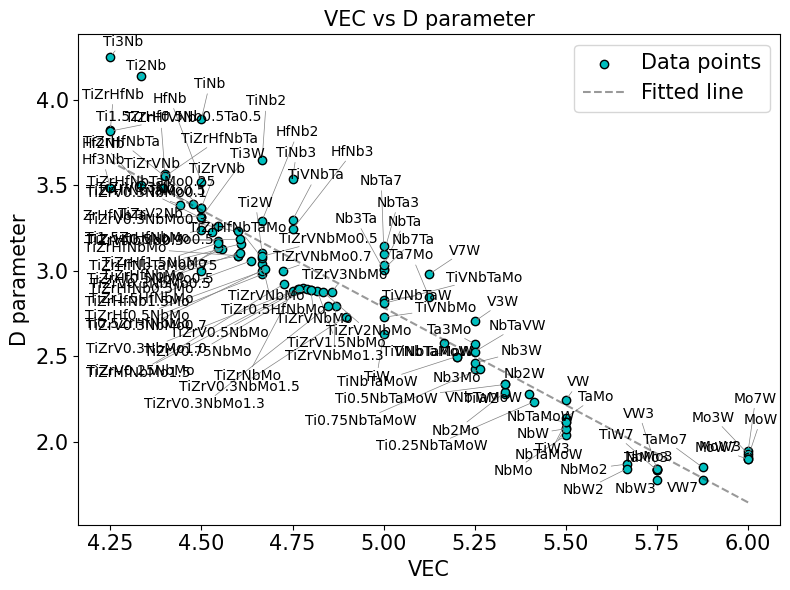

R-squared: 0.8947549271190217


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from adjustText import adjust_text

# Define the data
x = df['VEC']
y = df['DDFT Value']
alloy = df['Alloy Name']

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, edgecolors='k', color='c', marker='o', label='Data points')
plt.xlabel('VEC', fontsize=15)
plt.ylabel('D parameter', fontsize=15)
plt.title('VEC vs D parameter', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Linear regression
slope, intercept, r_value, _, _ = linregress(x, y)
regression_line = slope * x + intercept

# Plot the regression line
x1, x2 = [np.max(x), np.min(x)]
y1, y2 = [np.max(regression_line), np.min(regression_line)]
plt.plot([x1, x2], [y2, y1], color='k', linestyle='--', linewidth=1.5, alpha=0.4, label='Fitted line')
plt.legend(fontsize=15)

# Annotate alloy names with adjustText to avoid overlap
texts = [plt.text(x.iloc[i], y.iloc[i], alloy.iloc[i], fontsize=10, ha='right', va='bottom') for i in range(len(alloy))]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))

# Show plot
plt.tight_layout()

plt.show()

# Print the R-squared value
print("R-squared:", r_value**2)


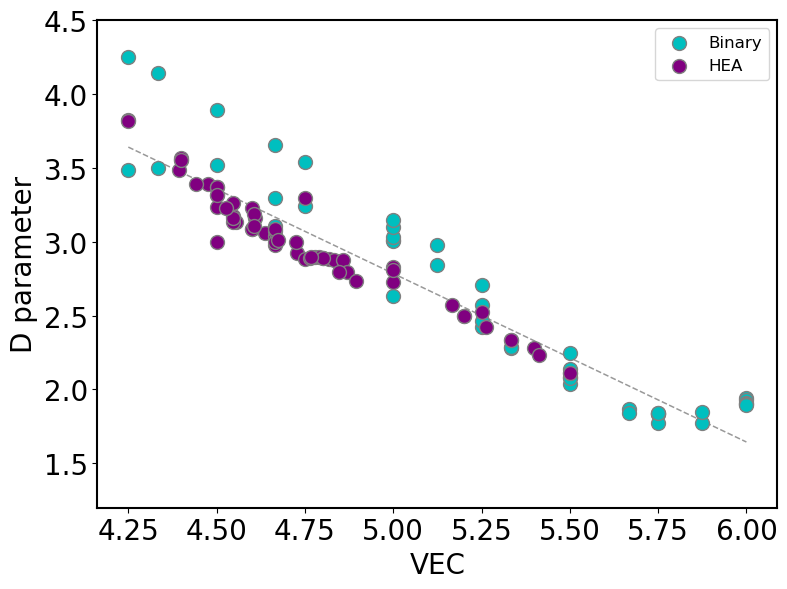

R-squared: 0.8947549271190217


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define the data
x = df['VEC']
y = df['DDFT Value']
alloy = df['Alloy Name']

fs = 20

# Define colors and labels based on alloy type
binary_alloys = [
    "Ti3Nb", "Ti2Nb", "TiNb", "TiNb2", "TiNb3",
    "Ti3W", "Ti2W", "TiW", "TiW2", "TiW3", "TiW7",
    "Hf3Nb", "Hf2Nb", "HfNb", "HfNb2", "HfNb3",
    "V7W", "V3W", "VW", "VW3", "VW7",
    "Nb7Ta", "Nb3Ta", "NbTa", "NbTa3", "NbTa7",
    "Nb3Mo", "Nb2Mo", "NbMo", "NbMo2", "NbMo3",
    "Nb3W", "Nb2W", "NbW", "NbW2", "NbW3",
    "Ta7Mo", "Ta3Mo", "TaMo", "TaMo3", "TaMo7",
    "Mo7W", "Mo3W", "MoW", "MoW3", "MoW7"
]
hea_alloys = [
    "NbTaMoW", "VNbTaMoW", "TiZrHfNbMo", "TiZrHfNb0.5Mo", "TiZrHfNb1.5Mo",
    "Ti0.5ZrHfNbMo", "Ti1.5ZrHfNbMo", "TiZr0.5HfNbMo", "TiZr1.5HfNbMo",
    "TiZrHf0.5NbMo", "TiZrHf1.5NbMo", "TiZrHf0.5NbMo0.5", "TiZrHfNbMo1.5",
    "TiZrHfNbTa", "TiZrHfNbTaMo0.25", "TiZrHfNbTaMo0.5", "TiZrHfNbTaMo0.75",
    "TiZrHfNbTaMo", "TiZrNbMo", "TiZrV0.25NbMo", "TiZrV0.5NbMo", "TiZrV0.75NbMo",
    "TiZrVNbMo", "TiZrV1.5NbMo", "TiZrV2NbMo", "TiZrV3NbMo", "TiVNbTa", "TiVNbTaW",
    "NbTaVW", "TiZrVNb", "TiZrV2Nb", "TiVNbMo", "TiZrHfVNb", "TiZrHfNbMo",
    "TiVNbTaMoW", "TiNbTaMoW", "NbTaMoW", "TiZrVNb", "TiZrV0.3Nb", "TiZrVNbMo0.3",
    "TiZrVNbMo0.5", "TiZrVNbMo0.7", "TiZrVNbMo", "TiZrVNbMo1.3", "TiZrV0.3NbMo0.1",
    "TiZrV0.3NbMo0.3", "TiZrV0.3NbMo0.5", "TiZrV0.3NbMo0.7", "TiZrV0.3NbMo1.0",
    "TiZrV0.3NbMo1.3", "TiZrV0.3NbMo1.5", "TiZrHf0.5NbMo0.5", "ZrHfNbTa",
    "Ti0.25NbTaMoW", "Ti0.5NbTaMoW", "Ti0.75NbTaMoW", "TiNbTaMoW", "TiVNbTaMo",
    "TiZrHfNbTa", "TiZrHfNb", "Ti1.5ZrHf0.5Nb0.5Ta0.5"
]

# Scatter plot with color coding and legend
plt.figure(figsize=(8, 6))
for i, alloy_name in enumerate(alloy):
    if alloy_name in hea_alloys:
        color, label = 'purple', 'HEA'
    elif alloy_name in binary_alloys:
        color, label = 'c', 'Binary'
    else:
        color, label = 'grey', 'Other'
    plt.scatter(x[i], y[i], s=100, edgecolors='grey', color=color, marker='o', label=label if label not in plt.gca().get_legend_handles_labels()[1] else "")

# Add legend
plt.legend( fontsize=12, title_fontsize=14, loc=1)

# Labels and limits
plt.xlabel('VEC', fontsize=fs)
plt.ylabel('D parameter', fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylim(1.2, 4.5)

# Linear regression
slope, intercept, r_value, _, _ = linregress(x, y)
regression_line = slope * np.array([np.min(x), np.max(x)]) + intercept
plt.plot([np.min(x), np.max(x)], regression_line, color='k', linestyle='--', linewidth=1.1, alpha=0.4, zorder=0)

# Formatting spines
spines = plt.gca()
for spine in plt.gca().spines.values():
    spine.set_linewidth(1.5)

# Display and save the plot
plt.tight_layout()
# plt.savefig('FIG-7A-Predicted-VEC-Dparameter.png', dpi=300, bbox_inches='tight')
plt.show()

# Print the R-squared value
print("R-squared:", r_value**2)


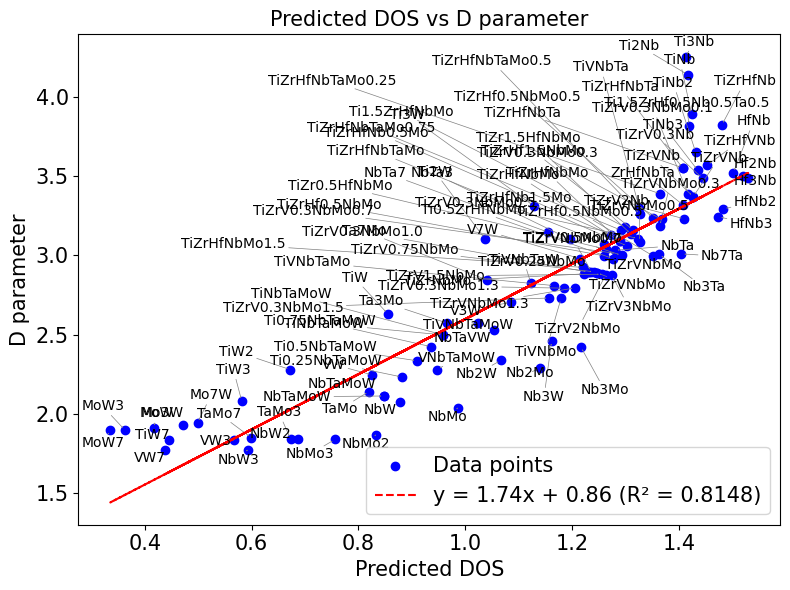

R-squared: 0.81478480496074


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define the data
x = df['DOS']
y = df['DDFT Value']

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.xlabel('Predicted DOS', fontsize=15)
plt.ylabel('D parameter', fontsize=15)
plt.title('Predicted DOS vs D parameter', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# Linear regression
slope, intercept, r_value, _, _ = linregress(x, y)
line_eq = f"y = {slope:.2f}x + {intercept:.2f} (R² = {r_value**2:.4f})"




# Plot the regression line
plt.plot(x, slope * x + intercept, color='red', linestyle='--', linewidth=1.5, label=line_eq)
plt.legend(fontsize=15)

# Display R-squared value and the equation on the plot
# plt.text(0.05, 0.95, line_eq, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
# Annotate alloy names with adjustText to avoid overlap
texts = [plt.text(x.iloc[i], y.iloc[i], alloy.iloc[i], fontsize=10, ha='right', va='bottom') for i in range(len(alloy))]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))

# Show plot
plt.tight_layout()
plt.show()

# Print the R-squared value
print("R-squared:", r_value**2)


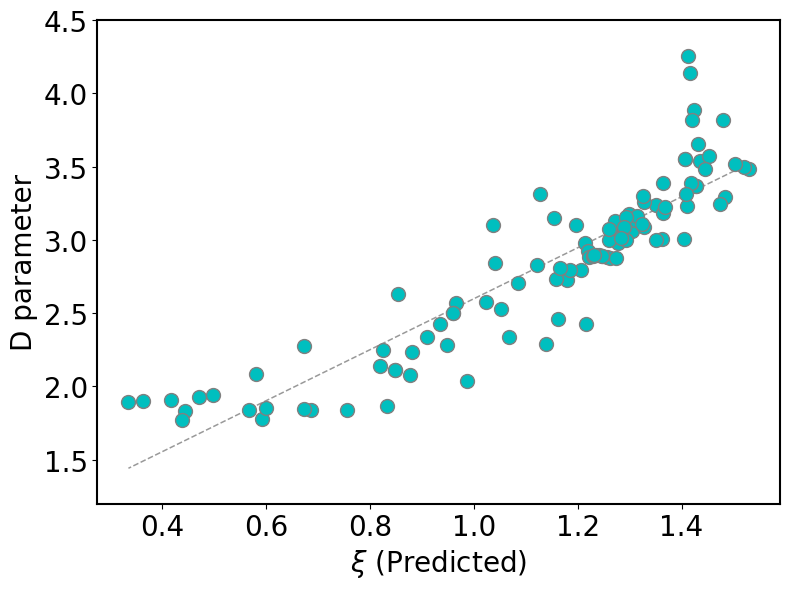

R-squared: 0.81478480496074


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define the data
x = df['DOS']
y = df['DDFT Value']
alloy =df['Alloy Name']

fs=20

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=100, edgecolors='grey', color= 'c', marker='o', label='Data points')
plt.xlabel('$\u03BE$ (Predicted)', fontsize=fs)
plt.ylabel('D parameter', fontsize=fs)
# plt.title('VEC vs D parameter', fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylim(1.2, 4.5)

# Linear regression
slope, intercept, r_value, _, _ = linregress(x, y)
line_eq = f"y = {slope:.2f}x + {intercept:.2f} (R² = {r_value**2:.4f})"

# Plot the regression line
# plt.plot(x, slope * x + intercept, color='red', linestyle='--', linewidth=1.5, label=line_eq)
# plt.plot(x, slope * x + intercept, color='red', linestyle='--', linewidth=1.5, label= 'Fitted line')

# Convert lists to numpy arrays
x_values = np.array(x)
y_values = np.array(y)

# Perform linear regression
slope, intercept, _, _, _ = linregress(x_values, y_values)

# Calculate the regression line
regression_line = slope * x_values + intercept

# Plot the regression line
x1 = np.max(x_values)
x2 = np.min(x_values)
x = [x1, x2]

reg = np.array(regression_line)
y1 = np.max(reg)
y2 = np.min(reg)

y = [y1, y2]

plt.plot(x, y, color='k', linestyle='--', linewidth=1.1, zorder=0, alpha=0.4, label= 'Fitted line')

spines = plt.gca()
for spine in plt.gca().spines.values():
    spine.set_linewidth(1.5)

# plt.legend(fontsize=17)

# Display R-squared value and the equation on the plot
# plt.text(0.05, 0.95, line_eq, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Show plot
plt.tight_layout()

plt.savefig('FIG-7B-Predicted-DOS-Dparameter.png', dpi=300, bbox_inches= 'tight')
plt.show()
# Print the R-squared value
print("R-squared:", r_value**2)


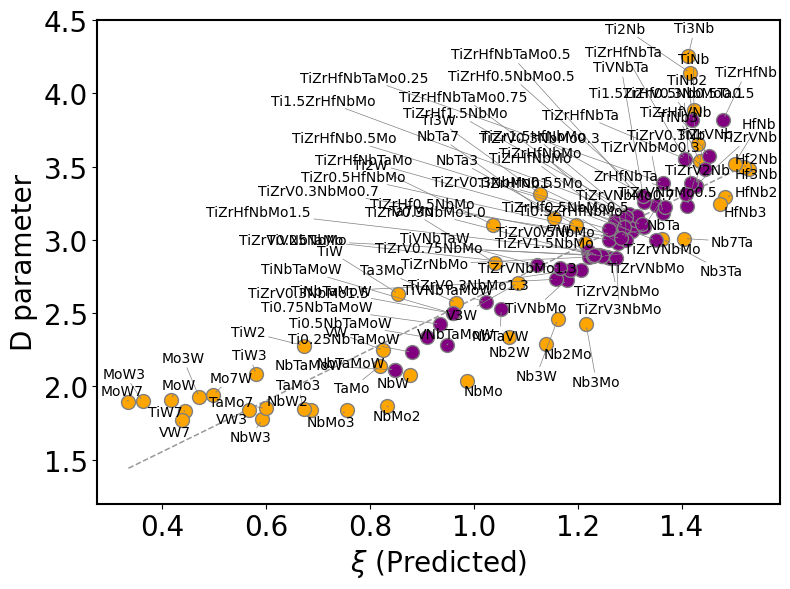

R-squared: 0.81478480496074


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define the data
x = df['DOS']
y = df['DDFT Value']
alloy = df['Alloy Name']

fs = 20

# Define colors based on alloy type
binary_alloys = [
    "Ti3Nb", "Ti2Nb", "TiNb", "TiNb2", "TiNb3",
    "Ti3W", "Ti2W", "TiW", "TiW2", "TiW3", "TiW7",
    "Hf3Nb", "Hf2Nb", "HfNb", "HfNb2", "HfNb3",
    "V7W", "V3W", "VW", "VW3", "VW7",
    "Nb7Ta", "Nb3Ta", "NbTa", "NbTa3", "NbTa7",
    "Nb3Mo", "Nb2Mo", "NbMo", "NbMo2", "NbMo3",
    "Nb3W", "Nb2W", "NbW", "NbW2", "NbW3",
    "Ta7Mo", "Ta3Mo", "TaMo", "TaMo3", "TaMo7",
    "Mo7W", "Mo3W", "MoW", "MoW3", "MoW7"
]
hea_alloys = [
    "NbTaMoW", "VNbTaMoW", "TiZrHfNbMo", "TiZrHfNb0.5Mo", "TiZrHfNb1.5Mo",
    "Ti0.5ZrHfNbMo", "Ti1.5ZrHfNbMo", "TiZr0.5HfNbMo", "TiZr1.5HfNbMo",
    "TiZrHf0.5NbMo", "TiZrHf1.5NbMo", "TiZrHf0.5NbMo0.5", "TiZrHfNbMo1.5",
    "TiZrHfNbTa", "TiZrHfNbTaMo0.25", "TiZrHfNbTaMo0.5", "TiZrHfNbTaMo0.75",
    "TiZrHfNbTaMo", "TiZrNbMo", "TiZrV0.25NbMo", "TiZrV0.5NbMo", "TiZrV0.75NbMo",
    "TiZrVNbMo", "TiZrV1.5NbMo", "TiZrV2NbMo", "TiZrV3NbMo", "TiVNbTa", "TiVNbTaW",
    "NbTaVW", "TiZrVNb", "TiZrV2Nb", "TiVNbMo", "TiZrHfVNb", "TiZrHfNbMo",
    "TiVNbTaMoW", "TiNbTaMoW", "NbTaMoW", "TiZrVNb", "TiZrV0.3Nb", "TiZrVNbMo0.3",
    "TiZrVNbMo0.5", "TiZrVNbMo0.7", "TiZrVNbMo", "TiZrVNbMo1.3", "TiZrV0.3NbMo0.1",
    "TiZrV0.3NbMo0.3", "TiZrV0.3NbMo0.5", "TiZrV0.3NbMo0.7", "TiZrV0.3NbMo1.0",
    "TiZrV0.3NbMo1.3", "TiZrV0.3NbMo1.5", "TiZrHf0.5NbMo0.5", "ZrHfNbTa",
    "Ti0.25NbTaMoW", "Ti0.5NbTaMoW", "Ti0.75NbTaMoW", "TiNbTaMoW", "TiVNbTaMo",
    "TiZrHfNbTa", "TiZrHfNb", "Ti1.5ZrHf0.5Nb0.5Ta0.5"
]

# Scatter plot with color coding
plt.figure(figsize=(8, 6))
for i, alloy_name in enumerate(alloy):
    if alloy_name in hea_alloys:
        color = 'purple'
    elif alloy_name in binary_alloys:
        color = 'orange'
    else:
        color = 'grey'  # Default color for other types if any
    plt.scatter(x[i], y[i], s=100, edgecolors='grey', color=color, marker='o')

# Labels and limits
plt.xlabel('$\u03BE$ (Predicted)', fontsize=fs)
plt.ylabel('D parameter', fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylim(1.2, 4.5)

# Linear regression
slope, intercept, r_value, _, _ = linregress(x, y)
regression_line = slope * np.array([np.min(x), np.max(x)]) + intercept
plt.plot([np.min(x), np.max(x)], regression_line, color='k', linestyle='--', linewidth=1.1, alpha=0.4, zorder=0)


texts = [plt.text(x.iloc[i], y.iloc[i], alloy.iloc[i], fontsize=10, ha='right', va='bottom') for i in range(len(alloy))]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))

# Formatting spines
spines = plt.gca()
for spine in plt.gca().spines.values():
    spine.set_linewidth(1.5)

# Display and save the plot
plt.tight_layout()
# plt.savefig('FIG-7B-Predicted-DOS-Dparameter.png', dpi=300, bbox_inches='tight')
plt.show()

# Print the R-squared value
print("R-squared:", r_value**2)


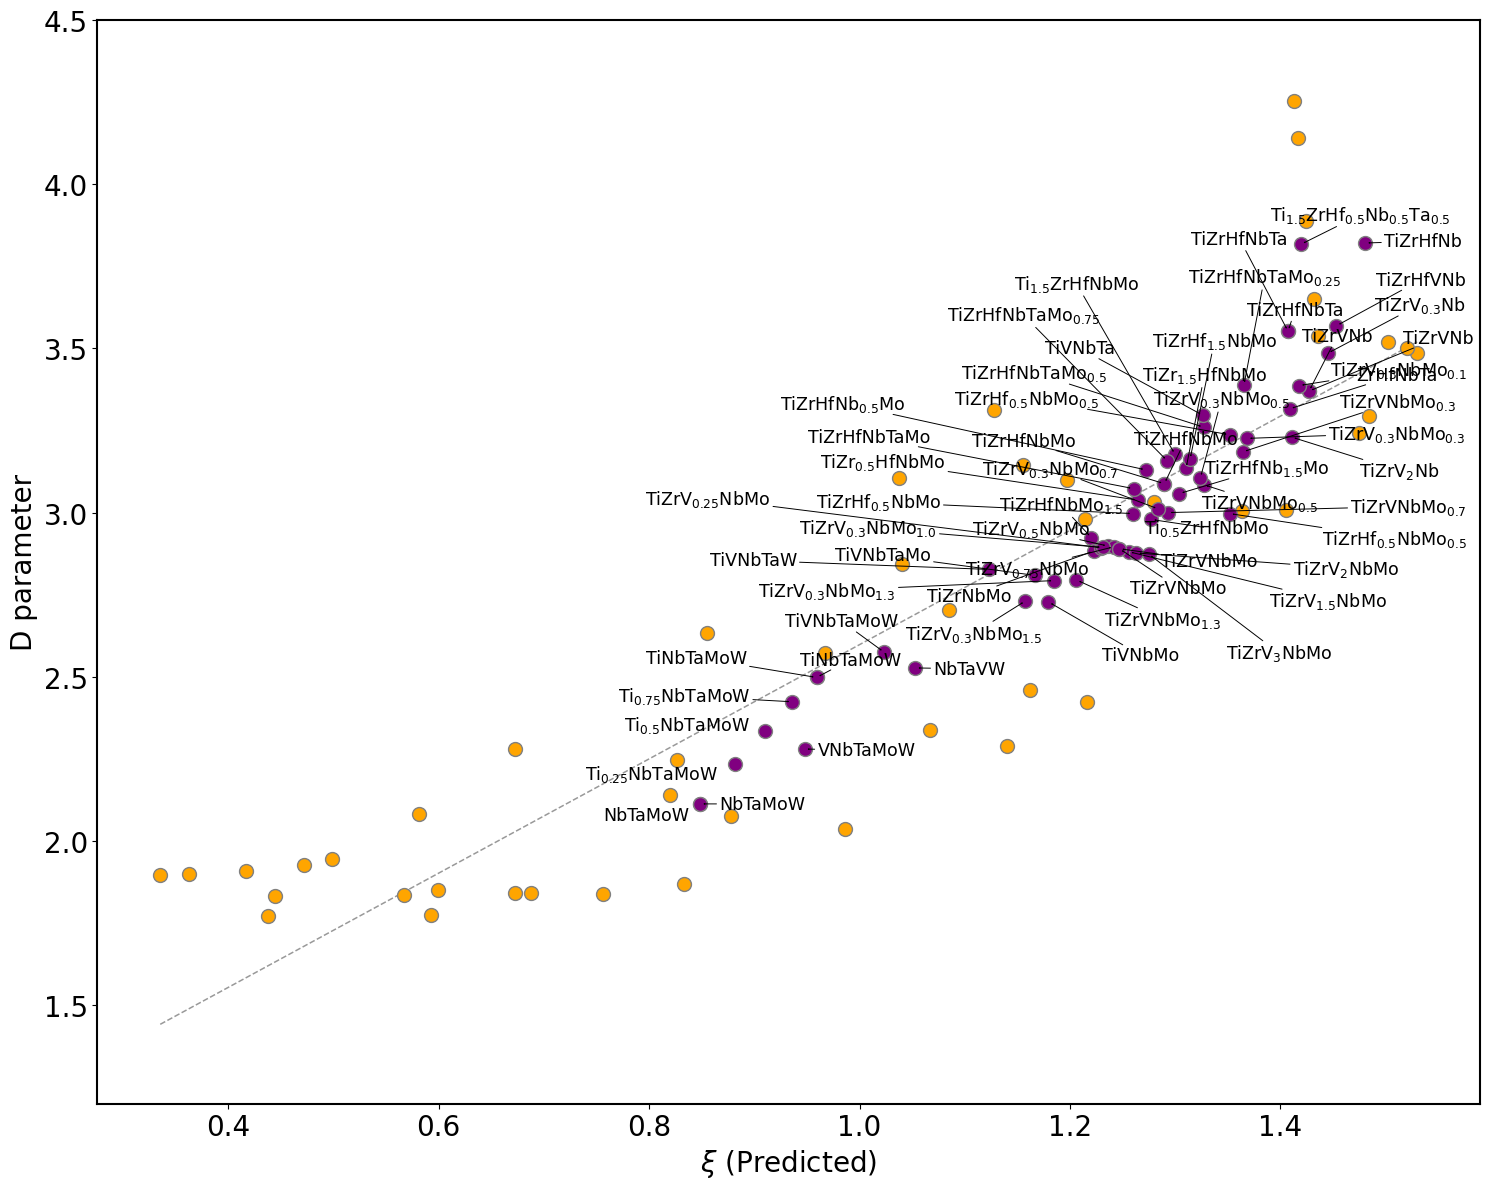

R-squared: 0.81478480496074


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from adjustText import adjust_text
import re

# Define the data
x = list(df['DOS'])
y = list(df['DDFT Value'])
alloy = list(df['Alloy Name'])

fs = 20

# Define alloy categories
binary_alloys = [
    "Ti3Nb", "Ti2Nb", "TiNb", "TiNb2", "TiNb3",
    "Ti3W", "Ti2W", "TiW", "TiW2", "TiW3", "TiW7",
    "Hf3Nb", "Hf2Nb", "HfNb", "HfNb2", "HfNb3",
    "V7W", "V3W", "VW", "VW3", "VW7",
    "Nb7Ta", "Nb3Ta", "NbTa", "NbTa3", "NbTa7",
    "Nb3Mo", "Nb2Mo", "NbMo", "NbMo2", "NbMo3",
    "Nb3W", "Nb2W", "NbW", "NbW2", "NbW3",
    "Ta7Mo", "Ta3Mo", "TaMo", "TaMo3", "TaMo7",
    "Mo7W", "Mo3W", "MoW", "MoW3", "MoW7"
]
hea_alloys = [
    "NbTaMoW", "VNbTaMoW", "TiZrHfNbMo", "TiZrHfNb0.5Mo", "TiZrHfNb1.5Mo",
    "Ti0.5ZrHfNbMo", "Ti1.5ZrHfNbMo", "TiZr0.5HfNbMo", "TiZr1.5HfNbMo",
    "TiZrHf0.5NbMo", "TiZrHf1.5NbMo", "TiZrHf0.5NbMo0.5", "TiZrHfNbMo1.5",
    "TiZrHfNbTa", "TiZrHfNbTaMo0.25", "TiZrHfNbTaMo0.5", "TiZrHfNbTaMo0.75",
    "TiZrHfNbTaMo", "TiZrNbMo", "TiZrV0.25NbMo", "TiZrV0.5NbMo", "TiZrV0.75NbMo",
    "TiZrVNbMo", "TiZrV1.5NbMo", "TiZrV2NbMo", "TiZrV3NbMo", "TiVNbTa", "TiVNbTaW",
    "NbTaVW", "TiZrVNb", "TiZrV2Nb", "TiVNbMo", "TiZrHfVNb", "TiZrHfNbMo",
    "TiVNbTaMoW", "TiNbTaMoW", "NbTaMoW", "TiZrVNb", "TiZrV0.3Nb", "TiZrVNbMo0.3",
    "TiZrVNbMo0.5", "TiZrVNbMo0.7", "TiZrVNbMo", "TiZrVNbMo1.3", "TiZrV0.3NbMo0.1",
    "TiZrV0.3NbMo0.3", "TiZrV0.3NbMo0.5", "TiZrV0.3NbMo0.7", "TiZrV0.3NbMo1.0",
    "TiZrV0.3NbMo1.3", "TiZrV0.3NbMo1.5", "TiZrHf0.5NbMo0.5", "ZrHfNbTa",
    "Ti0.25NbTaMoW", "Ti0.5NbTaMoW", "Ti0.75NbTaMoW", "TiNbTaMoW", "TiVNbTaMo",
    "TiZrHfNbTa", "TiZrHfNb", "Ti1.5ZrHf0.5Nb0.5Ta0.5"
]

# Scatter plot with color coding
plt.figure(figsize=(15, 12))
for i, alloy_name in enumerate(alloy):
    if alloy_name in hea_alloys:
        color = 'purple'
    elif alloy_name in binary_alloys:
        color = 'orange'
    else:
        color = 'grey'  # Default color for other types if any
    plt.scatter(x[i], y[i], s=100, edgecolors='grey', color=color, marker='o')

# Labels and limits
plt.xlabel('$\u03BE$ (Predicted)', fontsize=fs)
plt.ylabel('D parameter', fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylim(1.2, 4.5)

# Linear regression
slope, intercept, r_value, _, _ = linregress(x, y)
regression_line = slope * np.array([np.min(x), np.max(x)]) + intercept
plt.plot([np.min(x), np.max(x)], regression_line, color='k', linestyle='--', linewidth=1.1, alpha=0.4, zorder=0)


# Annotate each point with the corresponding alloy name
def format_alloy_name(name):
    return re.sub(r'(\d+\.?\d*)', r'$_{\1}$', name)

formatted_alloy = [format_alloy_name(name) for name in df['Alloy Name']]

fs = 12.6

texts = []
for i in range(len(x)):
    if alloy[i] not in binary_alloys:
        texts.append(plt.text(x[i], y[i], formatted_alloy[i], fontsize=fs, ha='center', va='bottom'))

# Adjust text to prevent overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='k', lw=0.7))




# Formatting spines
spines = plt.gca()
for spine in spines.spines.values():
    spine.set_linewidth(1.5)

# Display and save the plot
plt.tight_layout()
# plt.savefig('FIG-7B-Predicted-DOS-Dparameter.png', dpi=300, bbox_inches='tight')
plt.show()

# Print the R-squared value
print("R-squared:", r_value**2)


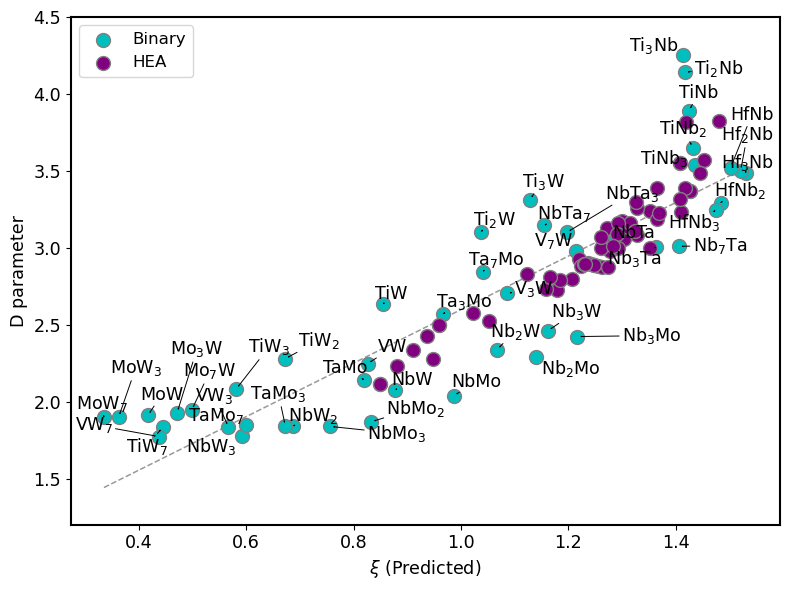

R-squared: 0.81478480496074


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define the data
x = df['DOS']
y = df['DDFT Value']
alloy = df['Alloy Name']

fs = 20

# Define colors and labels based on alloy type
binary_alloys = [
    "Ti3Nb", "Ti2Nb", "TiNb", "TiNb2", "TiNb3",
    "Ti3W", "Ti2W", "TiW", "TiW2", "TiW3", "TiW7",
    "Hf3Nb", "Hf2Nb", "HfNb", "HfNb2", "HfNb3",
    "V7W", "V3W", "VW", "VW3", "VW7",
    "Nb7Ta", "Nb3Ta", "NbTa", "NbTa3", "NbTa7",
    "Nb3Mo", "Nb2Mo", "NbMo", "NbMo2", "NbMo3",
    "Nb3W", "Nb2W", "NbW", "NbW2", "NbW3",
    "Ta7Mo", "Ta3Mo", "TaMo", "TaMo3", "TaMo7",
    "Mo7W", "Mo3W", "MoW", "MoW3", "MoW7"
]
hea_alloys = [
    "NbTaMoW", "VNbTaMoW", "TiZrHfNbMo", "TiZrHfNb0.5Mo", "TiZrHfNb1.5Mo",
    "Ti0.5ZrHfNbMo", "Ti1.5ZrHfNbMo", "TiZr0.5HfNbMo", "TiZr1.5HfNbMo",
    "TiZrHf0.5NbMo", "TiZrHf1.5NbMo", "TiZrHf0.5NbMo0.5", "TiZrHfNbMo1.5",
    "TiZrHfNbTa", "TiZrHfNbTaMo0.25", "TiZrHfNbTaMo0.5", "TiZrHfNbTaMo0.75",
    "TiZrHfNbTaMo", "TiZrNbMo", "TiZrV0.25NbMo", "TiZrV0.5NbMo", "TiZrV0.75NbMo",
    "TiZrVNbMo", "TiZrV1.5NbMo", "TiZrV2NbMo", "TiZrV3NbMo", "TiVNbTa", "TiVNbTaW",
    "NbTaVW", "TiZrVNb", "TiZrV2Nb", "TiVNbMo", "TiZrHfVNb", "TiZrHfNbMo",
    "TiVNbTaMoW", "TiNbTaMoW", "NbTaMoW", "TiZrVNb", "TiZrV0.3Nb", "TiZrVNbMo0.3",
    "TiZrVNbMo0.5", "TiZrVNbMo0.7", "TiZrVNbMo", "TiZrVNbMo1.3", "TiZrV0.3NbMo0.1",
    "TiZrV0.3NbMo0.3", "TiZrV0.3NbMo0.5", "TiZrV0.3NbMo0.7", "TiZrV0.3NbMo1.0",
    "TiZrV0.3NbMo1.3", "TiZrV0.3NbMo1.5", "TiZrHf0.5NbMo0.5", "ZrHfNbTa",
    "Ti0.25NbTaMoW", "Ti0.5NbTaMoW", "Ti0.75NbTaMoW", "TiNbTaMoW", "TiVNbTaMo",
    "TiZrHfNbTa", "TiZrHfNb", "Ti1.5ZrHf0.5Nb0.5Ta0.5"
]

# Scatter plot with color coding and legend
plt.figure(figsize=(8, 6))
for i, alloy_name in enumerate(alloy):
    if alloy_name in hea_alloys:
        color, label = 'purple', 'HEA'
    elif alloy_name in binary_alloys:
        color, label = 'c', 'Binary'
    else:
        color, label = 'grey', 'Other'
    plt.scatter(x[i], y[i], s=100, edgecolors='grey', color=color, marker='o', label=label if label not in plt.gca().get_legend_handles_labels()[1] else "")

# Annotate only binary alloys
# Annotate each point with the corresponding alloy name
def format_alloy_name(name):
    return re.sub(r'(\d+\.?\d*)', r'$_{\1}$', name)

formatted_alloy = [format_alloy_name(name) for name in df['Alloy Name']]

fs = 12.6

texts = []
for i in range(len(x)):
    if alloy[i] not in hea_alloys:
        texts.append(plt.text(x[i], y[i], formatted_alloy[i], fontsize=fs, ha='center', va='bottom'))

# Adjust text to prevent overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='k', lw=0.7))


# Add legend
plt.legend( fontsize=12, title_fontsize=14, loc='upper left')

# Labels and limits
plt.xlabel('$\u03BE$ (Predicted)', fontsize=fs)
plt.ylabel('D parameter', fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylim(1.2, 4.5)

# Linear regression
slope, intercept, r_value, _, _ = linregress(x, y)
regression_line = slope * np.array([np.min(x), np.max(x)]) + intercept
plt.plot([np.min(x), np.max(x)], regression_line, color='k', linestyle='--', linewidth=1.1, alpha=0.4, zorder=0)

# Formatting spines
spines = plt.gca()
for spine in plt.gca().spines.values():
    spine.set_linewidth(1.5)

# Display and save the plot
plt.tight_layout()
plt.savefig('FIG-7B-Predicted-DOS-Dparameter.png', dpi=300, bbox_inches='tight')
plt.show()

# Print the R-squared value
print("R-squared:", r_value**2)


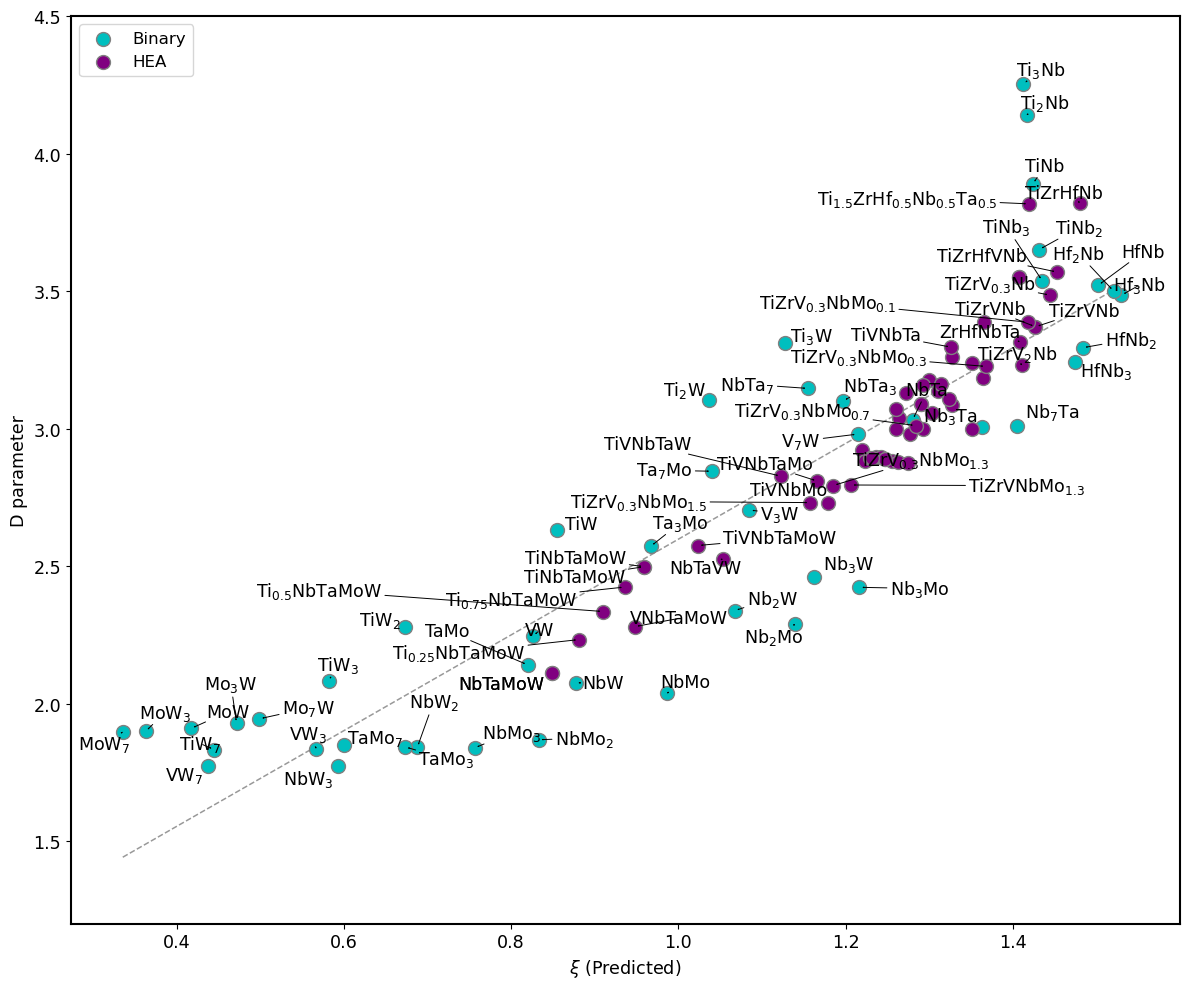

R-squared: 0.81478480496074


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define the data
x = df['DOS']
y = df['DDFT Value']
alloy = df['Alloy Name']

fs = 20

# Define colors and labels based on alloy type
binary_alloys = [
    "Ti3Nb", "Ti2Nb", "TiNb", "TiNb2", "TiNb3",
    "Ti3W", "Ti2W", "TiW", "TiW2", "TiW3", "TiW7",
    "Hf3Nb", "Hf2Nb", "HfNb", "HfNb2", "HfNb3",
    "V7W", "V3W", "VW", "VW3", "VW7",
    "Nb7Ta", "Nb3Ta", "NbTa", "NbTa3", "NbTa7",
    "Nb3Mo", "Nb2Mo", "NbMo", "NbMo2", "NbMo3",
    "Nb3W", "Nb2W", "NbW", "NbW2", "NbW3",
    "Ta7Mo", "Ta3Mo", "TaMo", "TaMo3", "TaMo7",
    "Mo7W", "Mo3W", "MoW", "MoW3", "MoW7"
]
hea_alloys = [
    "NbTaMoW", "VNbTaMoW", "TiZrHfNbMo", "TiZrHfNb0.5Mo", "TiZrHfNb1.5Mo",
    "Ti0.5ZrHfNbMo", "Ti1.5ZrHfNbMo", "TiZr0.5HfNbMo", "TiZr1.5HfNbMo",
    "TiZrHf0.5NbMo", "TiZrHf1.5NbMo", "TiZrHf0.5NbMo0.5", "TiZrHfNbMo1.5",
    "TiZrHfNbTa", "TiZrHfNbTaMo0.25", "TiZrHfNbTaMo0.5", "TiZrHfNbTaMo0.75",
    "TiZrHfNbTaMo", "TiZrNbMo", "TiZrV0.25NbMo", "TiZrV0.5NbMo", "TiZrV0.75NbMo",
    "TiZrVNbMo", "TiZrV1.5NbMo", "TiZrV2NbMo", "TiZrV3NbMo", "TiVNbTa", "TiVNbTaW",
    "NbTaVW", "TiZrVNb", "TiZrV2Nb", "TiVNbMo", "TiZrHfVNb", "TiZrHfNbMo",
    "TiVNbTaMoW", "TiNbTaMoW", "NbTaMoW", "TiZrVNb", "TiZrV0.3Nb", "TiZrVNbMo0.3",
    "TiZrVNbMo0.5", "TiZrVNbMo0.7", "TiZrVNbMo", "TiZrVNbMo1.3", "TiZrV0.3NbMo0.1",
    "TiZrV0.3NbMo0.3", "TiZrV0.3NbMo0.5", "TiZrV0.3NbMo0.7", "TiZrV0.3NbMo1.0",
    "TiZrV0.3NbMo1.3", "TiZrV0.3NbMo1.5", "TiZrHf0.5NbMo0.5", "ZrHfNbTa",
    "Ti0.25NbTaMoW", "Ti0.5NbTaMoW", "Ti0.75NbTaMoW", "TiNbTaMoW", "TiVNbTaMo",
    "TiZrHfNbTa", "TiZrHfNb", "Ti1.5ZrHf0.5Nb0.5Ta0.5"
]


hz_alloys = [
    "TiZrHfNbMo", "TiZrHfNb0.5Mo", "TiZrHfNb1.5Mo", "Ti0.5ZrHfNbMo", "Ti1.5ZrHfNbMo", "TiZr0.5HfNbMo",
    "TiZr1.5HfNbMo", "TiZrHf0.5NbMo", "TiZrHf1.5NbMo", "TiZrHf0.5NbMo0.5", "TiZrHfNbMo1.5", "TiZrHfNbTa",
    "TiZrHfNbTaMo0.25", "TiZrHfNbTaMo0.5", "TiZrHfNbTaMo0.75", "TiZrHfNbTaMo", "TiZrNbMo",
    "TiZrV0.25NbMo", "TiZrV0.5NbMo", "TiZrV0.75NbMo", "TiZrVNbMo", "TiZrV1.5NbMo", "TiZrV2NbMo", "TiZrV3NbMo",
    "TiZrV0.3NbMo1.0", "TiZrV0.3NbMo0.5", "TiZrVNbMo0.5", "TiZrVNbMo0.3", "TiZrVNbMo0.7"
]


# Scatter plot with color coding and legend
plt.figure(figsize=(12, 10))
for i, alloy_name in enumerate(alloy):
    if alloy_name in hea_alloys:
        color, label = 'purple', 'HEA'
    elif alloy_name in binary_alloys:
        color, label = 'c', 'Binary'
    else:
        color, label = 'grey', 'Other'
    plt.scatter(x[i], y[i], s=100, edgecolors='grey', color=color, marker='o', label=label if label not in plt.gca().get_legend_handles_labels()[1] else "")

# Annotate only binary alloys
# Annotate each point with the corresponding alloy name
def format_alloy_name(name):
    return re.sub(r'(\d+\.?\d*)', r'$_{\1}$', name)

formatted_alloy = [format_alloy_name(name) for name in df['Alloy Name']]

fs = 12.6

texts = []
for i in range(len(x)):
    if alloy[i] not in hz_alloys:
        texts.append(plt.text(x[i], y[i], formatted_alloy[i], fontsize=fs, ha='right', va='bottom'))

# Adjust text to prevent overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='k', lw=0.7))


# Add legend
plt.legend( fontsize=12, title_fontsize=14, loc='upper left')

# Labels and limits
plt.xlabel('$\u03BE$ (Predicted)', fontsize=fs)
plt.ylabel('D parameter', fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylim(1.2, 4.5)

# Linear regression
slope, intercept, r_value, _, _ = linregress(x, y)
regression_line = slope * np.array([np.min(x), np.max(x)]) + intercept
plt.plot([np.min(x), np.max(x)], regression_line, color='k', linestyle='--', linewidth=1.1, alpha=0.4, zorder=0)

# Formatting spines
spines = plt.gca()
for spine in plt.gca().spines.values():
    spine.set_linewidth(1.5)

# Display and save the plot
plt.tight_layout()
plt.savefig('FIG-7B-Predicted-DOS-Dparameter.png', dpi=300, bbox_inches='tight')
plt.show()

# Print the R-squared value
print("R-squared:", r_value**2)


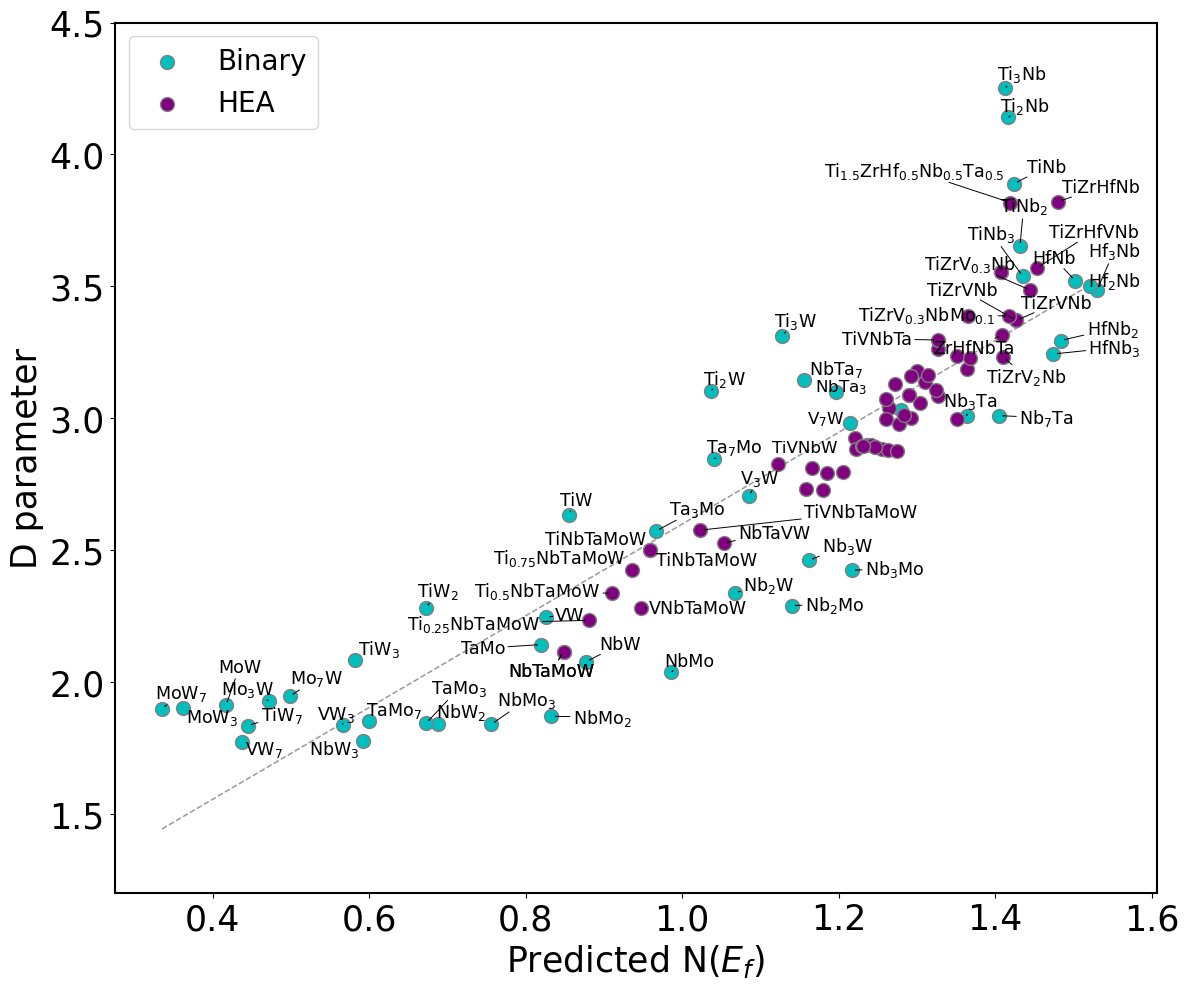

R-squared: 0.81478480496074


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define the data
x = df['DOS']
y = df['DDFT Value']
alloy = df['Alloy Name']

fs = 20

# Define colors and labels based on alloy type
binary_alloys = [
    "Ti3Nb", "Ti2Nb", "TiNb", "TiNb2", "TiNb3",
    "Ti3W", "Ti2W", "TiW", "TiW2", "TiW3", "TiW7",
    "Hf3Nb", "Hf2Nb", "HfNb", "HfNb2", "HfNb3",
    "V7W", "V3W", "VW", "VW3", "VW7",
    "Nb7Ta", "Nb3Ta", "NbTa", "NbTa3", "NbTa7",
    "Nb3Mo", "Nb2Mo", "NbMo", "NbMo2", "NbMo3",
    "Nb3W", "Nb2W", "NbW", "NbW2", "NbW3",
    "Ta7Mo", "Ta3Mo", "TaMo", "TaMo3", "TaMo7",
    "Mo7W", "Mo3W", "MoW", "MoW3", "MoW7"
]
hea_alloys = [
    "NbTaMoW", "VNbTaMoW", "TiZrHfNbMo", "TiZrHfNb0.5Mo", "TiZrHfNb1.5Mo",
    "Ti0.5ZrHfNbMo", "Ti1.5ZrHfNbMo", "TiZr0.5HfNbMo", "TiZr1.5HfNbMo",
    "TiZrHf0.5NbMo", "TiZrHf1.5NbMo", "TiZrHf0.5NbMo0.5", "TiZrHfNbMo1.5",
    "TiZrHfNbTa", "TiZrHfNbTaMo0.25", "TiZrHfNbTaMo0.5", "TiZrHfNbTaMo0.75",
    "TiZrHfNbTaMo", "TiZrNbMo", "TiZrV0.25NbMo", "TiZrV0.5NbMo", "TiZrV0.75NbMo",
    "TiZrVNbMo", "TiZrV1.5NbMo", "TiZrV2NbMo", "TiZrV3NbMo", "TiVNbTa", "TiVNbTaW",
    "NbTaVW", "TiZrVNb", "TiZrV2Nb", "TiVNbMo", "TiZrHfVNb", "TiZrHfNbMo",
    "TiVNbTaMoW", "TiNbTaMoW", "NbTaMoW", "TiZrVNb", "TiZrV0.3Nb", "TiZrVNbMo0.3",
    "TiZrVNbMo0.5", "TiZrVNbMo0.7", "TiZrVNbMo", "TiZrVNbMo1.3", "TiZrV0.3NbMo0.1",
    "TiZrV0.3NbMo0.3", "TiZrV0.3NbMo0.5", "TiZrV0.3NbMo0.7", "TiZrV0.3NbMo1.0",
    "TiZrV0.3NbMo1.3", "TiZrV0.3NbMo1.5", "TiZrHf0.5NbMo0.5", "ZrHfNbTa",
    "Ti0.25NbTaMoW", "Ti0.5NbTaMoW", "Ti0.75NbTaMoW", "TiNbTaMoW", "TiVNbTaMo",
    "TiZrHfNbTa", "TiZrHfNb", "Ti1.5ZrHf0.5Nb0.5Ta0.5"
]


hz_alloys = [    "TiZrHfNbMo", "TiZrHfNb0.5Mo", "TiZrHfNb1.5Mo", "Ti0.5ZrHfNbMo", "Ti1.5ZrHfNbMo", "TiZr0.5HfNbMo",
    "TiZr1.5HfNbMo", "TiZrHf0.5NbMo", "TiZrHf1.5NbMo", "TiZrHf0.5NbMo0.5", "TiZrHfNbMo1.5", "TiZrHfNbTa",
    "TiZrHfNbTaMo0.25", "TiZrHfNbTaMo0.5", "TiZrHfNbTaMo0.75", "TiZrHfNbTaMo", "TiZrNbMo", "TiZrHf0.5NbMo0.5",
    "TiZrV0.25NbMo", "TiZrV0.5NbMo", "TiZrV0.75NbMo", "TiZrVNbMo", "TiZrV1.5NbMo", "TiZrV2NbMo", "TiZrV3NbMo",
    "TiZrV0.3NbMo1.0", "TiZrV0.3NbMo0.5", 'TiZrV0.3NbMo0.7', "TiZrV0.3NbMo1.3", "TiZrVNbMo0.5", "TiZrVNbMo0.3", "TiZrVNbMo0.7", "TiZrVNbMo1.3", "TiVNbTaMo",
    "TiVNbTaW", 'NbTa', 'NbTa3', 'V7W','TiZrV0.3NbMo0.3' ,'TiZrV0.3NbMo1.5', 'TiVNbMo'


]




"""
    "TiZrV0.25NbMo", "TiZrV0.5NbMo", "TiZrV0.75NbMo", "TiZrVNbMo", "TiZrV1.5NbMo", "TiZrV2NbMo", "TiZrV3NbMo",
    "TiZrV0.3NbMo1.0", "TiZrV0.3NbMo0.5","TiZrV0.3NbMo1.3", "TiZrVNbMo0.5", "TiZrVNbMo0.3", "TiZrVNbMo0.7", "TiZrVNbMo1.3", "TiVNbTaMo",
    "TiVNbTaW"
"""
# Scatter plot with color coding and legend
plt.figure(figsize=(12, 10))
for i, alloy_name in enumerate(alloy):
    if alloy_name in hea_alloys:
        color, label = 'purple', 'HEA'
    elif alloy_name in binary_alloys:
        color, label = 'c', 'Binary'
    else:
        color, label = 'grey', 'Other'
    plt.scatter(x[i], y[i], s=100, edgecolors='grey', color=color, marker='o', label=label if label not in plt.gca().get_legend_handles_labels()[1] else "")

# Annotate only binary alloys
# Annotate each point with the corresponding alloy name
def format_alloy_name(name):
    return re.sub(r'(\d+\.?\d*)', r'$_{\1}$', name)

formatted_alloy = [format_alloy_name(name) for name in df['Alloy Name']]

fs = 12.6

texts = []
for i in range(len(x)):
    if alloy[i] not in hz_alloys:
        texts.append(plt.text(x[i], y[i], formatted_alloy[i], fontsize=fs, ha='center', va='bottom'))

# Adjust text to prevent overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='k', lw=0.7))


fss=25


plt.text(1.115, 2.87,  'TiVNbW', fontsize= 12)
plt.text(1.16, 2.98,  'V$_7$W', fontsize= 12)
plt.text(1.17, 3.1,  'NbTa$_3$', fontsize= 12)

# plt.text(1.25, 2.6,  'TiZrV$_{0.3}$NbMo$_{1.3}$', fontsize= 12)
# plt.text(1.1, 2.655,  'TiZrV$_{0.3}$NbMo$_{1.5}$', fontsize= 12)

# plt.text(1.25, 2.5,  'TiZrV$_{0.75}$NbMo', fontsize= 12)
# plt.text(1.25, 2.7,  'TiVNbMo', fontsize= 12)

# plt.text(1.4, 2.9,  'HEA-A', fontsize= 12)
# plt.text(1.4, 2.7,  'HEA-B', fontsize= 12)




# Add legend
plt.legend( fontsize=20, title_fontsize=14, loc='upper left')

# Labels and limits
plt.xlabel('Predicted N($E_f$)', fontsize=fss)
plt.ylabel('D parameter', fontsize=fss)
plt.xticks(fontsize=fss)
plt.yticks(fontsize=fss)
plt.ylim(1.2, 4.5)

# Linear regression
slope, intercept, r_value, _, _ = linregress(x, y)
regression_line = slope * np.array([np.min(x), np.max(x)]) + intercept
plt.plot([np.min(x), np.max(x)], regression_line, color='k', linestyle='--', linewidth=1.1, alpha=0.4, zorder=0)

# Formatting spines
spines = plt.gca()
for spine in plt.gca().spines.values():
    spine.set_linewidth(1.5)

# Display and save the plot
plt.tight_layout()
plt.savefig('FIG-7B-Predicted-DOS-Dparameter.png', dpi=300, bbox_inches='tight')
plt.show()

# Print the R-squared value
print("R-squared:", r_value**2)


In [25]:
# df.to_excel("alloy_data_ddft_with_vec_evrh-DOS.xlsx", index=False)

# VEC vs DOS : correlation analysis

In [26]:
df = df[(df['VEC']==5) | (df['VEC']==5.5)]
df

,Alloy Name,DDFT Value,VEC,E-vrh,DOS
7,TiW,2.632,5.0,249.000,0.854842
9,TiW3,2.082,5.5,315.500,0.581543
18,VW,2.246,5.5,256.000,0.826074
21,Nb7Ta,3.009,5.0,115.125,1.405035
22,Nb3Ta,3.006,5.0,125.250,1.363424
23,NbTa,3.032,5.0,145.500,1.280201
24,NbTa3,3.100,5.0,165.750,1.196979
25,NbTa7,3.146,5.0,175.875,1.155368
28,NbMo,2.038,5.5,217.000,0.986354
33,NbW,2.076,5.5,243.500,0.877446


In [27]:
X_test = df[['E-vrh']] 

In [28]:
y_pred = loaded_model.predict(X_test)
print(y_pred)

[0.85484205 0.58154347 0.82607378 1.40503524 1.36342399 1.28020149
 1.19697899 1.15536774 0.98635415 0.87744569 0.81990915 0.84867742
 1.12279795 1.17951254 0.84867742 1.16636133]


16 16 16


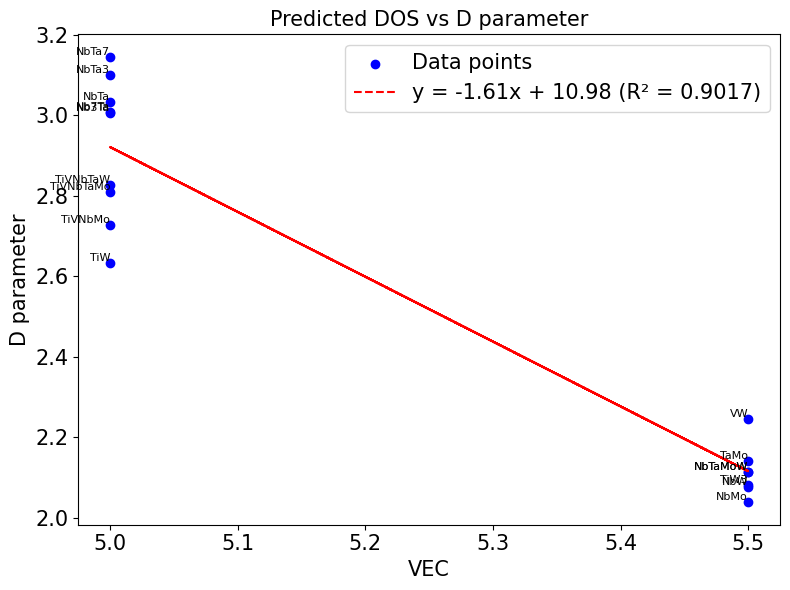

R-squared: 0.9016918435363855


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define the data
x = df['VEC']
y = df['DDFT Value']
alloy = df['Alloy Name']
print(len(alloy), len(x), len(y))


# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.xlabel('VEC', fontsize=15)
plt.ylabel('D parameter', fontsize=15)
plt.title('Predicted DOS vs D parameter', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# Linear regression
slope, intercept, r_value, _, _ = linregress(x, y)
line_eq = f"y = {slope:.2f}x + {intercept:.2f} (R² = {r_value**2:.4f})"

# Plot the regression line
plt.plot(x, slope * x + intercept, color='red', linestyle='--', linewidth=1.5, label=line_eq)
plt.legend(fontsize=15)

# Display R-squared value and the equation on the plot
# Annotate each alloy using iloc to access by index
for i in range(len(alloy)):
    plt.annotate(alloy.iloc[i], (x.iloc[i], y.iloc[i]), fontsize=8, ha='right', va='bottom')

# Show plot
plt.tight_layout()
plt.show()

# Print the R-squared value
print("R-squared:", r_value**2)



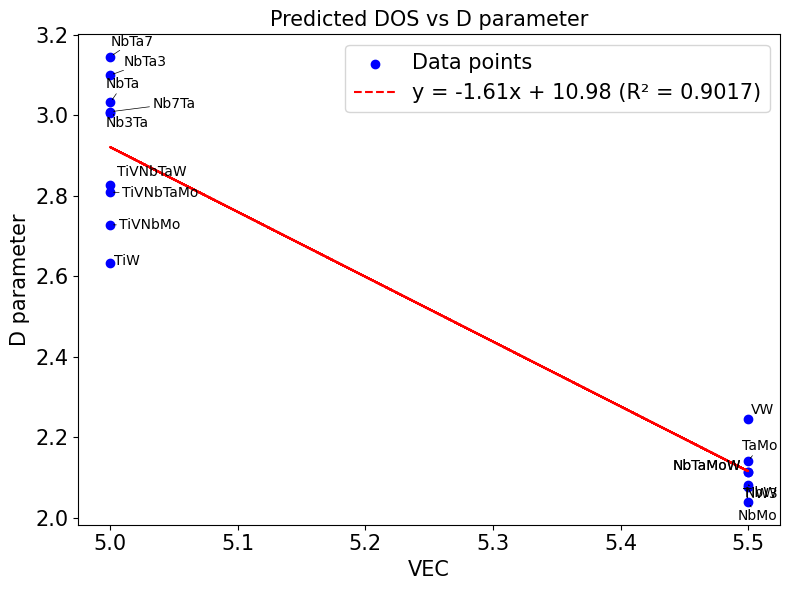

R-squared: 0.9016918435363855


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from adjustText import adjust_text

# Define the data
x = df['VEC']
y = df['DDFT Value']
alloy = df['Alloy Name']

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.xlabel('VEC', fontsize=15)
plt.ylabel('D parameter', fontsize=15)
plt.title('Predicted DOS vs D parameter', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Linear regression
slope, intercept, r_value, _, _ = linregress(x, y)
line_eq = f"y = {slope:.2f}x + {intercept:.2f} (R² = {r_value**2:.4f})"

# Plot the regression line
plt.plot(x, slope * x + intercept, color='red', linestyle='--', linewidth=1.5, label=line_eq)
plt.legend(fontsize=15)

# Prepare annotations
texts = []
for i in range(len(alloy)):
    texts.append(plt.text(x.iloc[i], y.iloc[i], alloy.iloc[i], fontsize=10))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black', lw=0.5))

# Show plot
plt.tight_layout()
plt.show()

# Print the R-squared value
print("R-squared:", r_value**2)


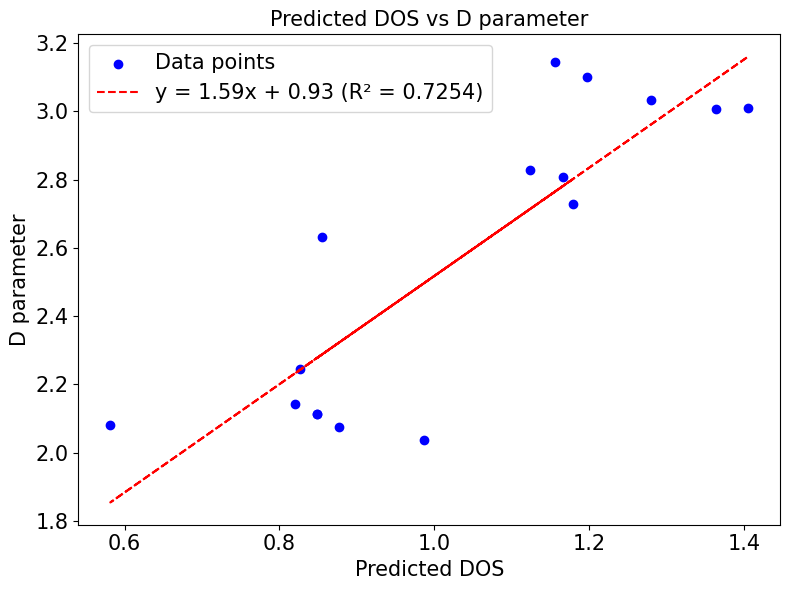

R-squared: 0.7254378604888488


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define the data
x = df['DOS']
y = df['DDFT Value']

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.xlabel('Predicted DOS', fontsize=15)
plt.ylabel('D parameter', fontsize=15)
plt.title('Predicted DOS vs D parameter', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# Linear regression
slope, intercept, r_value, _, _ = linregress(x, y)
line_eq = f"y = {slope:.2f}x + {intercept:.2f} (R² = {r_value**2:.4f})"

# Plot the regression line
plt.plot(x, slope * x + intercept, color='red', linestyle='--', linewidth=1.5, label=line_eq)
plt.legend(fontsize=15)

# Display R-squared value and the equation on the plot
# plt.text(0.05, 0.95, line_eq, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Show plot
plt.tight_layout()
plt.show()

# Print the R-squared value
print("R-squared:", r_value**2)


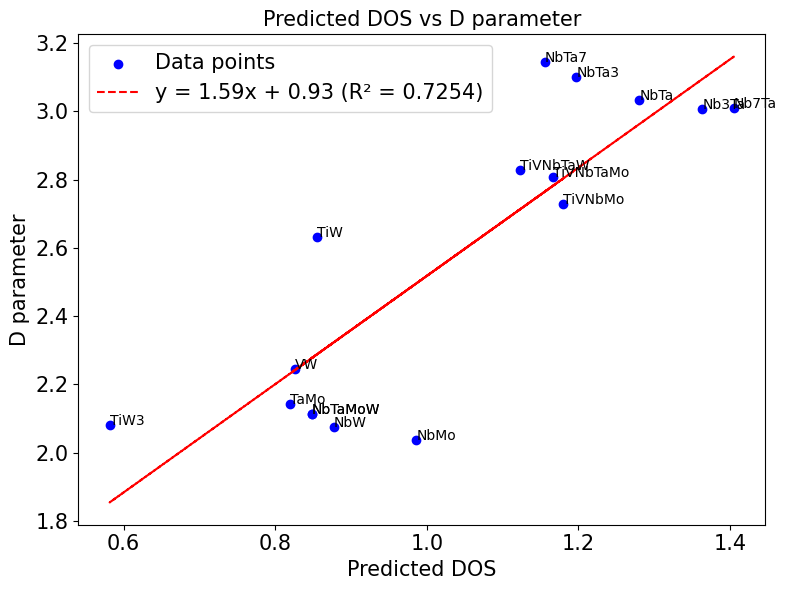

R-squared: 0.7254378604888488


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define the data
x = df['DOS']
y = df['DDFT Value']

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.xlabel('Predicted DOS', fontsize=15)
plt.ylabel('D parameter', fontsize=15)
plt.title('Predicted DOS vs D parameter', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# Linear regression
slope, intercept, r_value, _, _ = linregress(x, y)
line_eq = f"y = {slope:.2f}x + {intercept:.2f} (R² = {r_value**2:.4f})"

# Plot the regression line
plt.plot(x, slope * x + intercept, color='red', linestyle='--', linewidth=1.5, label=line_eq)
plt.legend(fontsize=15)

# Display R-squared value and the equation on the plot
from adjustText import adjust_text
# Prepare annotations
texts = []
for i in range(len(alloy)):
    texts.append(plt.text(x.iloc[i], y.iloc[i], alloy.iloc[i], fontsize=10))

# Show plot
plt.tight_layout()
plt.show()

# Print the R-squared value
print("R-squared:", r_value**2)


In [35]:
dft = pd.read_excel('alloy_data_ddft_with_vec_evrh-DOS-actul-predicted.xlsx', sheet_name ='Sheet2')
dft.head()

,Alloy Name,DDFT Value,VEC,R-E-vrh,A-E-vrh,p-DOS,A-DOS
0,TiNb,3.889,4.5,110.5,65.929,1.424043,1.660182
1,TiW,2.632,5.0,249.0,141.624,0.854842,1.336653
2,VW,2.246,5.5,256.0,211.867,0.826074,1.168344
3,NbTa,3.032,5.0,145.5,121.832,1.280201,1.564622
4,NbMo,2.038,5.5,217.0,236.544,0.986354,0.713968


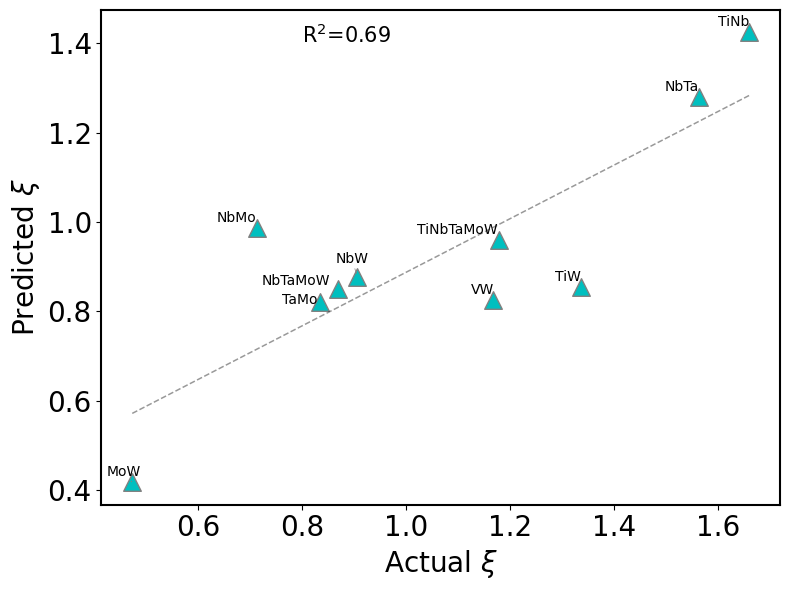

R-squared: 0.6915640494702537


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define the data
x = dft['A-DOS']
y = dft['p-DOS']
alloy =dft['Alloy Name']

fs=20

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=160, edgecolors='grey', color= 'c', marker='^', label='Data points')
plt.xlabel('Actual $\u03BE$', fontsize=fs)
plt.ylabel('Predicted $\u03BE$', fontsize=fs)
# plt.title('VEC vs D parameter', fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
# plt.ylim(1.2, 4.5)

# Linear regression
slope, intercept, r_value, _, _ = linregress(x, y)
line_eq = f"y = {slope:.2f}x + {intercept:.2f} (R² = {r_value**2:.4f})"

# Calculate the regression line points for the entire range
x_values = np.array([x.min(), x.max()])
regression_line = slope * x_values + intercept

# Plot the regression line
plt.plot(x_values, regression_line, color='k', linestyle='--', linewidth=1.1, alpha=0.4, label='Fitted line')

# Adjust plot spines
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

# Annotate alloy names with adjustText to avoid overlap
texts = [plt.text(x.iloc[i], y.iloc[i], alloy.iloc[i], fontsize=10, ha='right', va='bottom') for i in range(len(alloy))]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))

# Display R-squared value and the equation on the plot
plt.text(0.8, 1.4, 'R$^2$=0.69', fontsize=15)
# Show plot
plt.tight_layout()

# plt.savefig('FIG-7B-Predicted-DOS-Dparameter.png', dpi=300, bbox_inches= 'tight')
plt.show()
# Print the R-squared value
print("R-squared:", r_value**2)


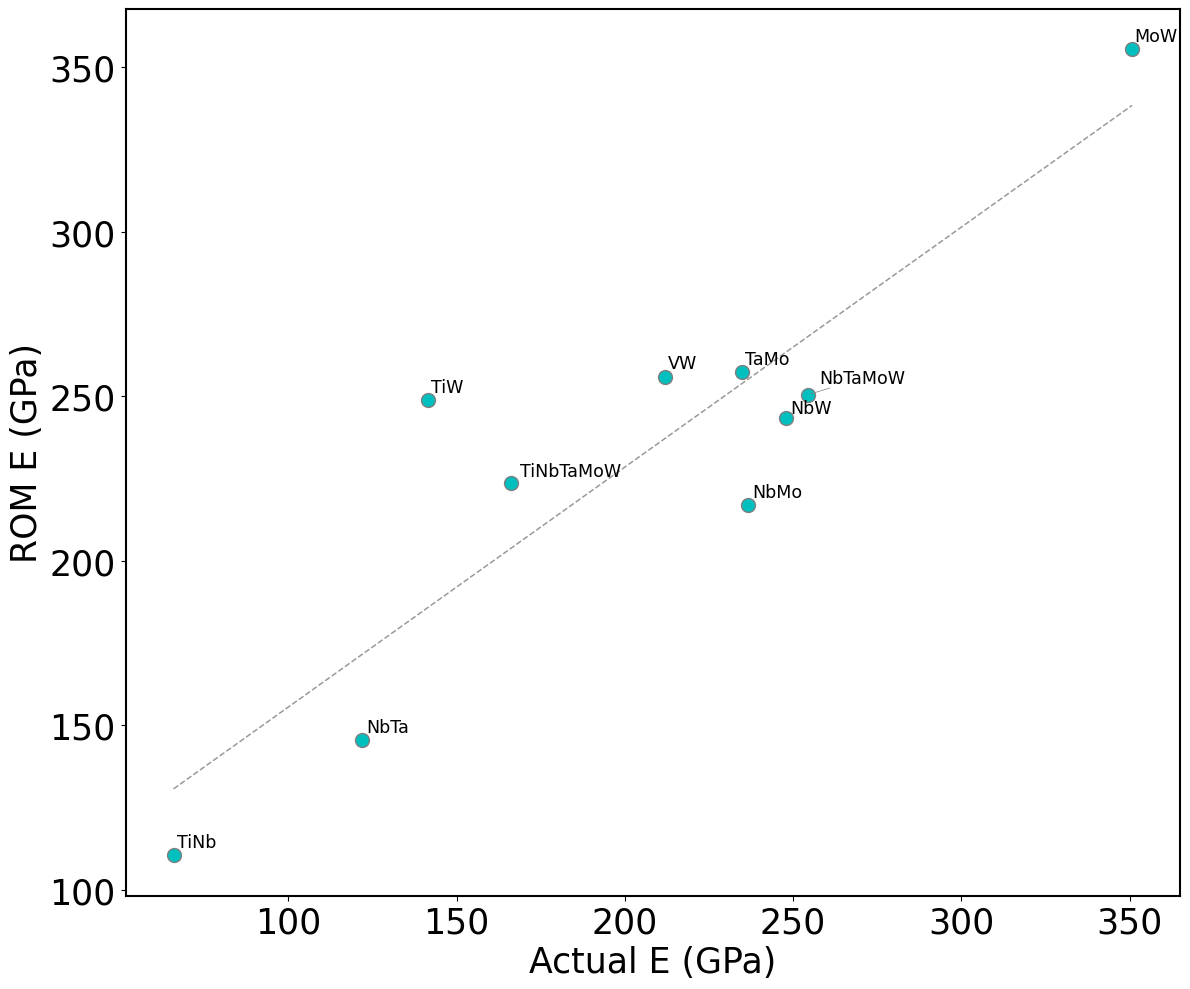

R-squared: 0.7918927440869579


In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from adjustText import adjust_text

# Define the data
x = dft['A-E-vrh']
y = dft['R-E-vrh']
alloy = dft['Alloy Name']

fs = 25

# Scatter plot
plt.figure(figsize=(12,10))
plt.scatter(x, y, s=100, edgecolors='grey', color='c', marker='o', label='Data points')
plt.xlabel('Actual E (GPa)', fontsize=fs)
plt.ylabel('ROM E (GPa)', fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

# Linear regression
slope, intercept, r_value, _, _ = linregress(x, y)
line_eq = f"y = {slope:.2f}x + {intercept:.2f} (R² = {r_value**2:.4f})"

# Calculate the regression line points for the entire range
x_values = np.array([x.min(), x.max()])
regression_line = slope * x_values + intercept

# Plot the regression line
plt.plot(x_values, regression_line, color='k', linestyle='--', linewidth=1.1, alpha=0.4, label='Fitted line')

# Adjust plot spines
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

# Annotate alloy names with adjustText to avoid overlap
texts = [plt.text(x.iloc[i], y.iloc[i], alloy.iloc[i], fontsize=12.6, ha='left', va='bottom') for i in range(len(alloy))]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))
# plt.text(150, 350, 'R$^2$=0.79', fontsize=15)
# Display R-squared value on the plot
# plt.legend()
plt.tight_layout()
plt.savefig('FIG-7A-Predicted-E-Actual.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print the R-squared value
print("R-squared:", r_value**2)


In [38]:
dft

,Alloy Name,DDFT Value,VEC,R-E-vrh,A-E-vrh,p-DOS,A-DOS
0,TiNb,3.889,4.5,110.5,65.929,1.424043,1.660182
1,TiW,2.632,5.0,249.0,141.624,0.854842,1.336653
2,VW,2.246,5.5,256.0,211.867,0.826074,1.168344
3,NbTa,3.032,5.0,145.5,121.832,1.280201,1.564622
4,NbMo,2.038,5.5,217.0,236.544,0.986354,0.713968
5,NbW,2.076,5.5,243.5,248.025,0.877446,0.906581
6,TaMo,2.141,5.5,257.5,234.905,0.819909,0.834572
7,MoW,1.910,6.0,355.5,350.720,0.417153,0.474191
8,NbTaMoW,2.113,5.5,250.5,254.320,0.848677,0.870000
9,TiNbTaMoW,2.498,5.2,223.6,166.301,0.959230,1.180000
